<a href="https://colab.research.google.com/github/mgarbanzo/GOES16/blob/main/Lab2_Parte3_Radiaci%C3%B3n_y_%C3%93ptica_Atmosf%C3%A9rica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

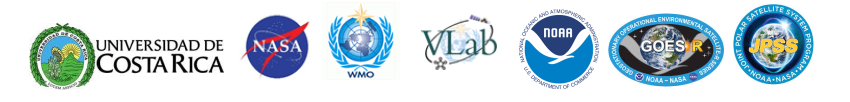

# Diferencia de dos tiempos para un mismo canal

## Radiación y óptica atmosférica

Marcial Garbanzo Salas, M.Sc., PhD.

Profesor

---

En este ejemplo se describe y muestra como obtener una diferencia temporal para un mismo canal del sensor ABI del satélite GOES 16 de NOAA utilizando Python en la nube y minimizando el uso de recursos locales de Internet y capacidad de procesamiento.

---


# Antes de comenzar...

Recuerde que existen casillas de Texto y de Código.

Puede agregar casillas utilizando los botones de arriba a la izquierda donde dice 

> \+ Código

y 

> \+ Texto

luego para ejecutar el código o dejar finalizar la edición de texto debe presionar

> Shift + Enter

sobre cada casilla individual.

---

Por cierto, el tipo de texto que se utiliza aquí es llamado **Markdown** y puede aprender más acerca de como utilizarlo [aquí en Inglés](https://www.markdownguide.org/basic-syntax/) o [aquí en Español](https://markdown.es/sintaxis-markdown/).

---

IMPORTANTE:

1.   A la izquieda de esta página aparece un ícono de una carpeta, al presionarlo pueden ver los archivos que descargan o generan durante la ejecución de este notebook.
2.   Lo que se presenta aquí es un ejemplo mínimo y no representa todo lo que el estudiantado puede lograr para este producto. Por ejemplo, hacer zoom en la región de interés requeriría recortar la matriz final para lo que puede utilizar las dimensiones de la matriz.
3. El ejemplo mostrado corresponde al Canal 5. Si requiere otros canales DEBE cambiar los links que indican donde está la información correcta. Para eso debe copiar el enlace de la página indicada en esa sección y pegarlo en el lugar adecuado para descarga dentro de este notebook. Note que si está descargando el archivo a su compu y tratando de subirlo a este notebook está haciendolo mal, consumirá mucho tiempo y recursos que podría utilizar escribiendo y haciendo el análisis.





# Primero debemos obtener la información para el cálculo de la diferencia temporal.

Vamos a utilizar datos del huracán Iota (Nov, 2020).

Podemos descargar Canal 5 para el 16 de Noviembre a las 18:00 y 18:30 UTC. Los enlaces mostrados se obtuvieron de [este enlace](http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi?source=aws&satellite=noaa-goes16&domain=F&product=ABI-L2-CMIP&date=2020-11-16&hour=18).

Note que se comienza con la instrucción !wget donde:

> el símbolo **!** indica que no es un comando de Python sino de GNU/Linux 

y 

> **wget** es un programa para descargar información de sitios web.

Descargamos los datos ejecutando las siguientes dos casillas de código:

In [19]:
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/321/18/OR_ABI-L2-CMIPF-M6C05_G16_s20203211800151_e20203211809459_c20203211809549.nc

--2020-11-27 19:11:49--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/321/18/OR_ABI-L2-CMIPF-M6C05_G16_s20203211800151_e20203211809459_c20203211809549.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.217.84.68
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.217.84.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96493489 (92M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-CMIPF-M6C05_G16_s20203211800151_e20203211809459_c20203211809549.nc.1’

OR_ABI-L2-CMIPF-M6C 100%[===================>]  92.02M  36.9MB/s    in 2.5s    

2020-11-27 19:11:52 (36.9 MB/s) - ‘OR_ABI-L2-CMIPF-M6C05_G16_s20203211800151_e20203211809459_c20203211809549.nc.1’ saved [96493489/96493489]



In [20]:
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/321/18/OR_ABI-L2-CMIPF-M6C05_G16_s20203211830151_e20203211839459_c20203211839548.nc

--2020-11-27 19:11:52--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/321/18/OR_ABI-L2-CMIPF-M6C05_G16_s20203211830151_e20203211839459_c20203211839548.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.216.105.235
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.216.105.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94295096 (90M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-CMIPF-M6C05_G16_s20203211830151_e20203211839459_c20203211839548.nc.1’

OR_ABI-L2-CMIPF-M6C 100%[===================>]  89.93M  34.5MB/s    in 2.6s    

2020-11-27 19:11:55 (34.5 MB/s) - ‘OR_ABI-L2-CMIPF-M6C05_G16_s20203211830151_e20203211839459_c20203211839548.nc.1’ saved [94295096/94295096]



# Se requieren algunas librerías para poder leer datos satelitales

Una de las librerías más usadas para leer datos satelitales es **NetCDF4** que se instala con el siguiente comando:

In [3]:
!pip install netCDF4

     |████████████████████████████████| 4.3MB 7.5MB/s 
     |████████████████████████████████| 296kB 36.4MB/s 


Una vez instalada, se puede incorporar en Python junto a otras librería útiles para visualización y manipulación de arreglos de números:

In [4]:
import pylab as plt
from netCDF4 import Dataset

# Asignar el metadato a los datos es simple y rápido

En la casilla siguiente se utiliza el comando Dataset de la librería NetCDF4 para cargar los metadatos a las variables ncABIC02 y ncABIC13.



In [6]:
ncABIC05tA = Dataset("/content/OR_ABI-L2-CMIPF-M6C05_G16_s20203211800151_e20203211809459_c20203211809549.nc")
ncABIC05tB = Dataset("/content/OR_ABI-L2-CMIPF-M6C05_G16_s20203211830151_e20203211839459_c20203211839548.nc")

Luego se extraen las matrices que contienen los datos:

In [10]:
datosA = ncABIC05tA.variables['CMI'][:,:]
datosB = ncABIC05tB.variables['CMI'][:,:]

Finalmente podemos hacer la resta de tiempo A menos tiempo B y graficar el producto:

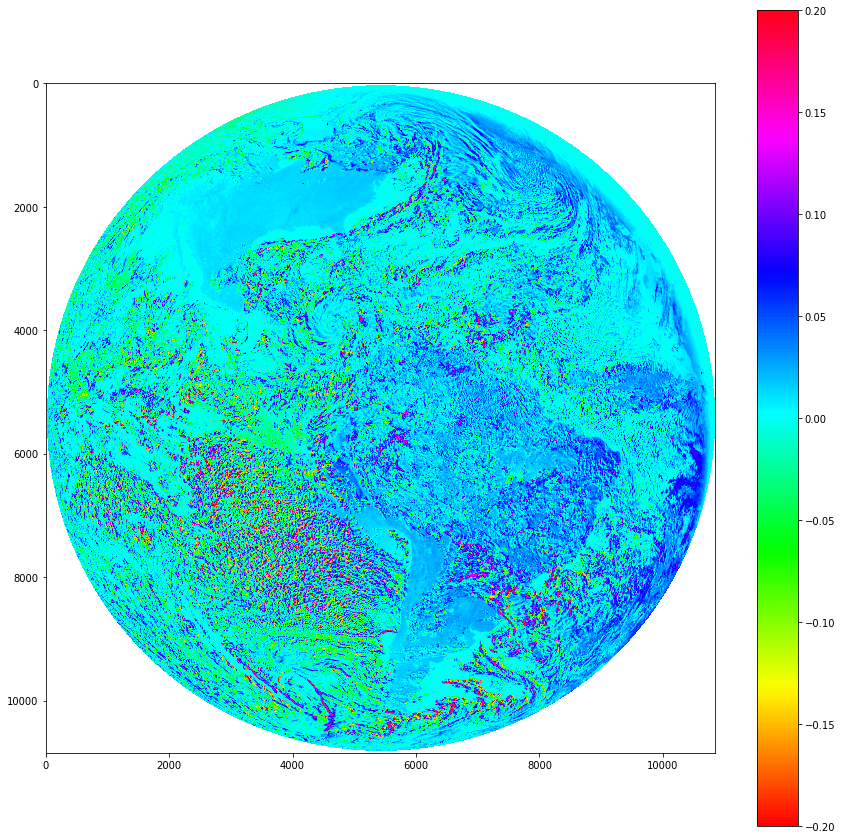

In [18]:
datos = datosA - datosB
fig, ax = plt.subplots(1,figsize=(15,15))
plt.imshow(datos,cmap='hsv',vmin=-0.2, vmax=0.2)
plt.colorbar()
plt.savefig("diferencia.png",dpi=250)

El archivo diferencia.png es de alta resolucióón y contiene la imagen que pueden descargar a sus computadoras para el análisis posterior.